**Data preprocessing and feature engineering in machine learning**

**Objective:**

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

**1. Data Exploration and Preprocessing:**

* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:

  ◦ Standard Scaling

  ◦ Min-Max Scaling
* Discuss the scenarios where each scaling technique is preferred and why.

In [3]:
adult_data = pd.read_csv('/content/adult_with_headers.csv')
adult_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult_data[adult_data.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
adult_data[(adult_data['age'] == 35) & (adult_data['fnlwgt'] == 379959)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16846,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
32404,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [8]:
adult_data[(adult_data['age'] == 23) & (adult_data['fnlwgt'] == 240137)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
21103,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
25872,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K


In [9]:
adult_data_nd = adult_data.drop_duplicates()
adult_data_nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
adult_data_nd[adult_data_nd.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [11]:
adult_data_nd = adult_data_nd.reset_index(drop = True)
adult_data_nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
print(adult_data.shape[0])
print(adult_data_nd.shape[0])
print('Number of duplicates removed: ', adult_data.shape[0] - adult_data_nd.shape[0])

32561
32537
Number of duplicates removed:  24


In [13]:
adult_data_nd.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
numercal_features = adult_data_nd.select_dtypes(include=np.number)
numercal_features

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32532,27,257302,12,0,0,38
32533,40,154374,9,0,0,40
32534,58,151910,9,0,0,40
32535,22,201490,9,0,0,20


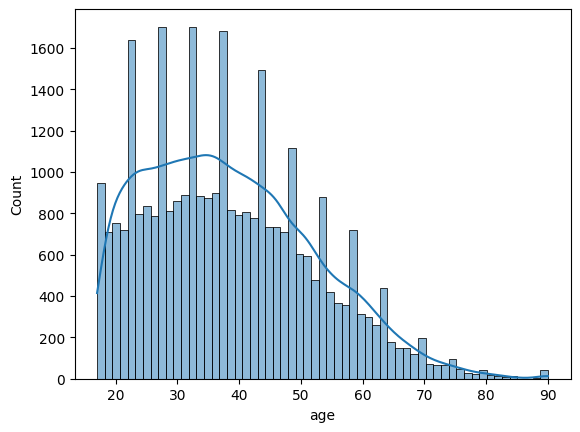

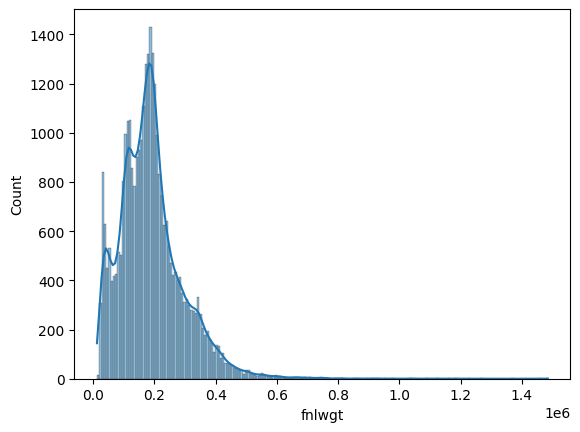

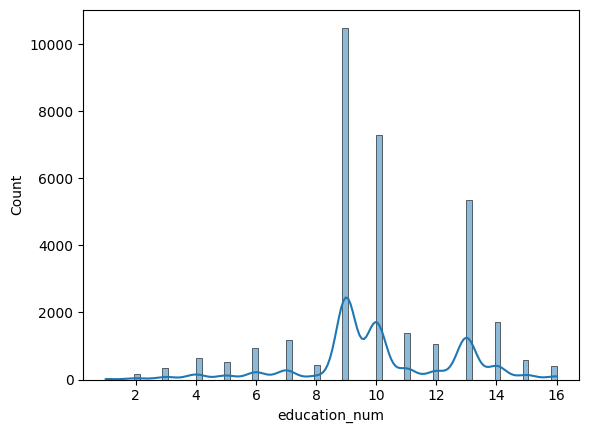

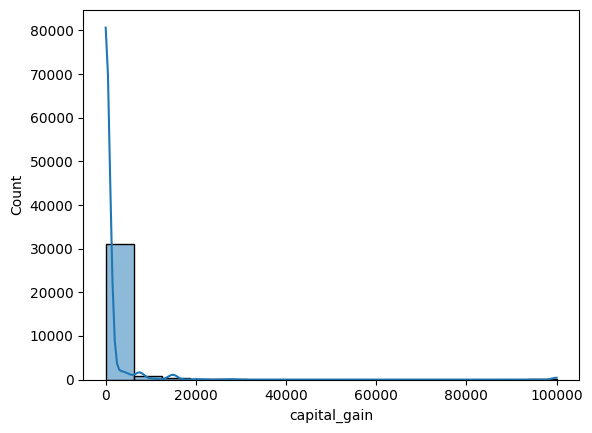

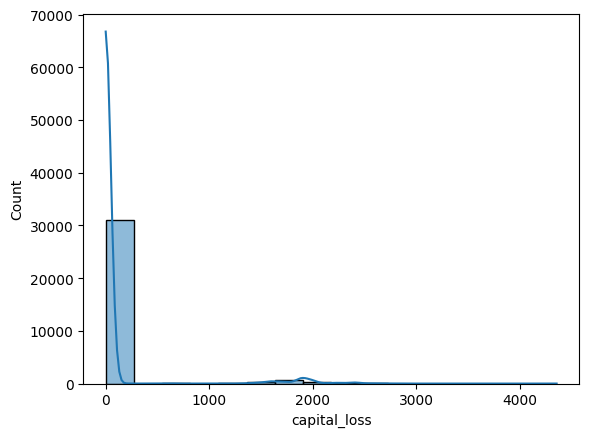

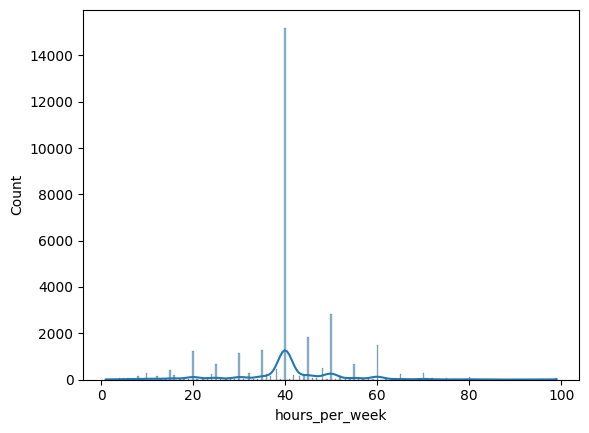

In [16]:
for f in numercal_features.columns:
  sea.histplot(adult_data_nd[f], kde = True)
  plt.show()

In [17]:
scaler = StandardScaler()
numercal_features_scaled = scaler.fit_transform(numercal_features)
print(numercal_features_scaled)
numercal_features_scaled = pd.DataFrame(numercal_features_scaled, columns = numercal_features.columns)
numercal_features_scaled

[[ 0.03038995 -1.06356884  1.13477712  0.14829174 -0.21674317 -0.03566374]
 [ 0.8369732  -1.00866848  1.13477712 -0.14597544 -0.21674317 -2.22248299]
 [-0.0429358   0.24503992 -0.42067868 -0.14597544 -0.21674317 -0.03566374]
 ...
 [ 1.42357919 -0.35877886 -0.42067868 -0.14597544 -0.21674317 -0.03566374]
 [-1.2161478   0.11092955 -0.42067868 -0.14597544 -0.21674317 -1.65552985]
 [ 0.9836247   0.92981187 -0.42067868  1.88763548 -0.21674317 -0.03566374]]


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


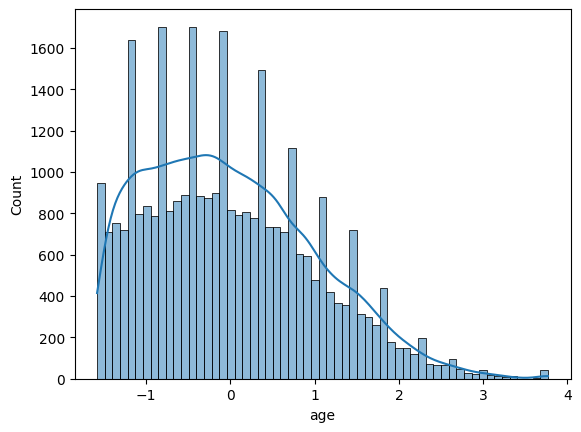

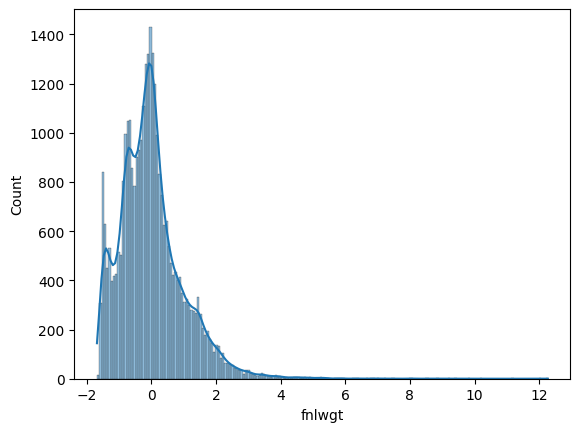

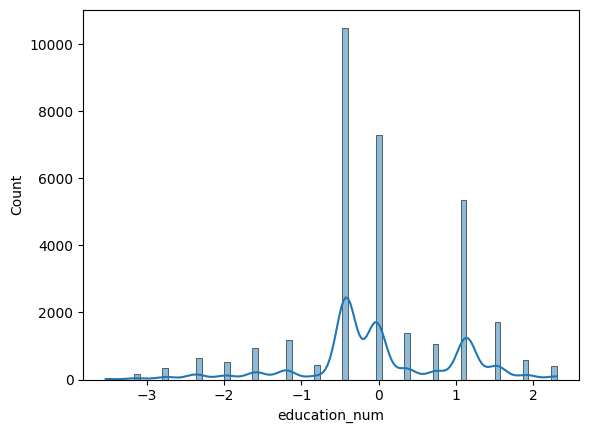

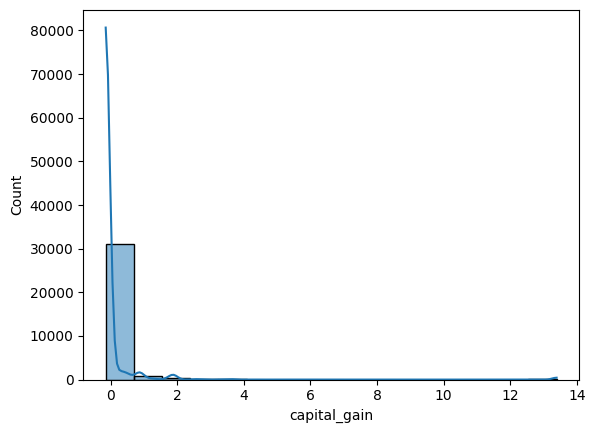

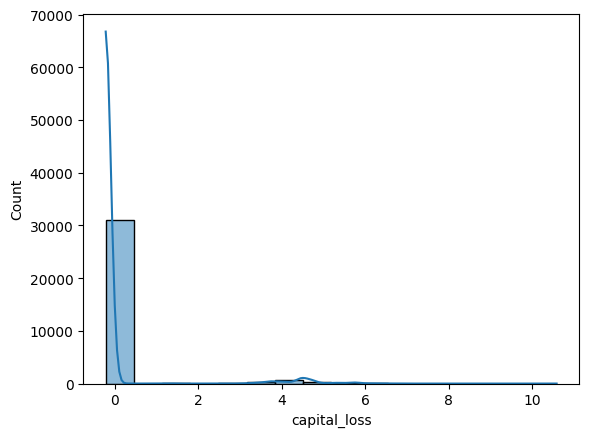

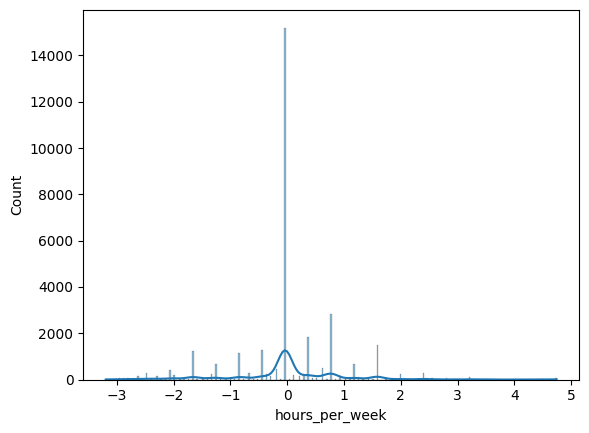

In [18]:
for f in numercal_features_scaled.columns:
  sea.histplot(numercal_features_scaled[f], kde = True)
  plt.show()

Plots of the numerical features are nearly identical before and applying scalaring.

In [19]:
min_max_scaler = MinMaxScaler()
numercal_features_minmaxsca = min_max_scaler.fit_transform(numercal_features)
print(numercal_features_minmaxsca)
numercal_features_minmaxsca = pd.DataFrame(numercal_features_minmaxsca, columns = numercal_features.columns)
numercal_features_minmaxsca

[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918]
 ...
 [0.56164384 0.09482688 0.53333333 0.         0.         0.39795918]
 [0.06849315 0.12849934 0.53333333 0.         0.         0.19387755]
 [0.47945205 0.18720338 0.53333333 0.1502415  0.         0.39795918]]


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


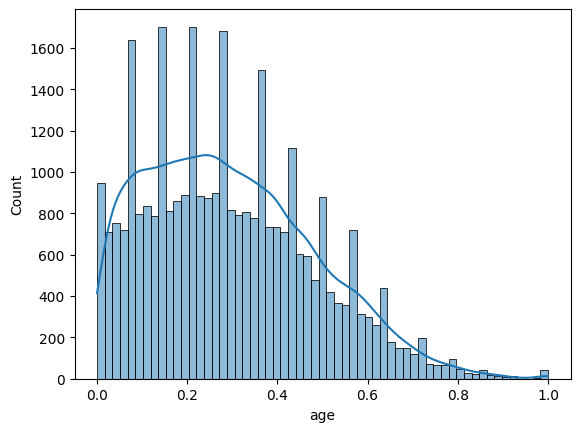

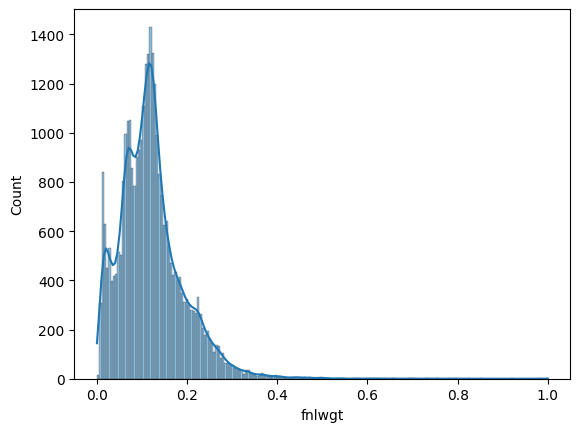

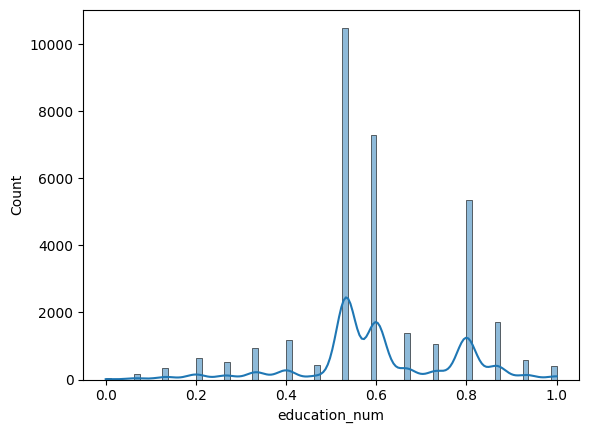

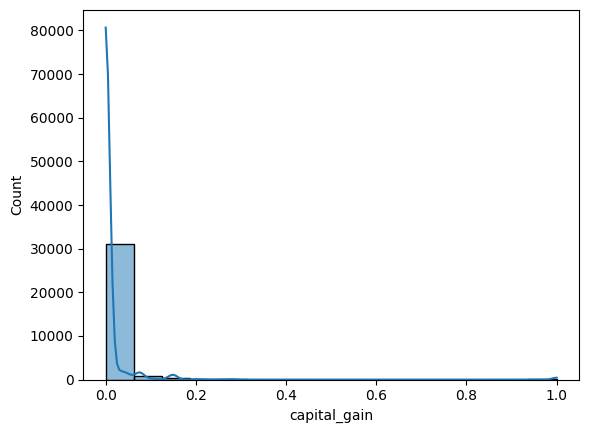

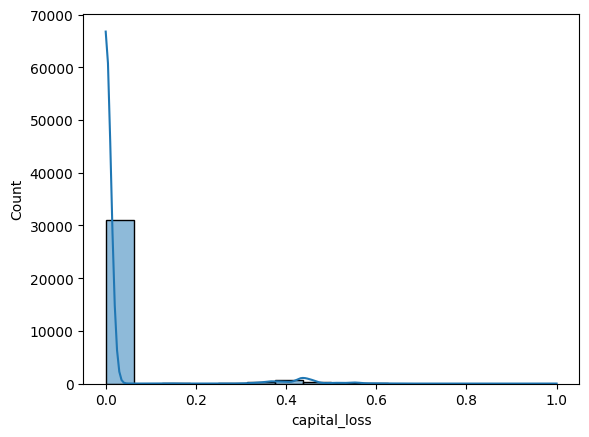

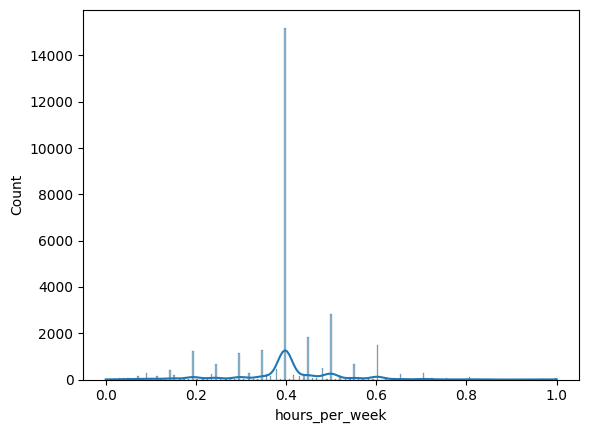

In [20]:
for f in numercal_features_minmaxsca.columns:
  sea.histplot(numercal_features_minmaxsca[f], kde = True)
  plt.show()

Min-Max scaling is a normalization method. The plots (histpolts) are nearly the same as that of scalar method. Moreover, both approaches show that the shape of these two plots are the same irrespective of the scaling method. Main difference is in the x-axis.

**2. Encoding Techniques:**

* Apply One-Hot Encoding to categorical variables with less than 5 categories.
* Use Label Encoding for categorical variables with more than 5 categories.
* Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [21]:
non_numerical_features = adult_data_nd.select_dtypes(exclude=np.number)
non_numerical_features

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32532,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32533,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32534,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32535,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [22]:
print(non_numerical_features.workclass.unique())
print('\n', non_numerical_features.education.unique())
print('\n', non_numerical_features.marital_status.unique())
print('\n', non_numerical_features.occupation.unique())
print('\n', non_numerical_features.relationship.unique())
print('\n', non_numerical_features.race.unique())
print('\n', non_numerical_features.sex.unique())
print('\n', non_numerical_features.native_country.unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

 [' Male' ' Female']

 [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canad

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [24]:
ohencoder = OneHotEncoder(drop = 'first', sparse_output = False)
oh_race = ohencoder.fit_transform(non_numerical_features[['race']])
oh_race = pd.DataFrame(oh_race, columns = ohencoder.get_feature_names_out())
oh_race

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
32532,0.0,0.0,0.0,1.0
32533,0.0,0.0,0.0,1.0
32534,0.0,0.0,0.0,1.0
32535,0.0,0.0,0.0,1.0


In [25]:
ohencoder = OneHotEncoder(drop = 'first', sparse_output = False)
oh_sex = ohencoder.fit_transform(non_numerical_features[['sex']])
oh_sex = pd.DataFrame(oh_sex, columns = ohencoder.get_feature_names_out())
oh_sex

,sex_ Male
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
32532,0.0
32533,1.0
32534,0.0
32535,1.0


In [26]:
lencoder = LabelEncoder()
le_workclass = lencoder.fit_transform(non_numerical_features['workclass'])
le_workclass = pd.DataFrame(le_workclass, columns = ['workclass'])
le_workclass

,workclass
0,7
1,6
2,4
3,4
4,4
...,...
32532,4
32533,4
32534,4
32535,4


In [27]:
#lencoder = LabelEncoder()
le_education = lencoder.fit_transform(non_numerical_features['education'])
le_education = pd.DataFrame(le_education, columns = ['education'])
le_education

,education
0,9
1,9
2,11
3,1
4,9
...,...
32532,7
32533,11
32534,11
32535,11


In [28]:
le_marital_status = lencoder.fit_transform(non_numerical_features['marital_status'])
le_marital_status = pd.DataFrame(le_marital_status, columns = ['marital_status'])
le_marital_status

,marital_status
0,4
1,2
2,0
3,2
4,2
...,...
32532,2
32533,2
32534,6
32535,4


In [29]:
le_occupation = lencoder.fit_transform(non_numerical_features['occupation'])
le_occupation = pd.DataFrame(le_occupation, columns = ['occupation'])
le_occupation

,occupation
0,1
1,4
2,6
3,6
4,10
...,...
32532,13
32533,7
32534,1
32535,1


In [30]:
le_relationship = lencoder.fit_transform(non_numerical_features['relationship'])
le_relationship = pd.DataFrame(le_relationship, columns = ['relationship'])
le_relationship

,relationship
0,1
1,0
2,1
3,0
4,5
...,...
32532,5
32533,0
32534,4
32535,3


In [31]:
le_native_country = lencoder.fit_transform(non_numerical_features['native_country'])
le_native_country = pd.DataFrame(le_native_country, columns = ['native_country'])
le_native_country

,native_country
0,39
1,39
2,39
3,39
4,5
...,...
32532,39
32533,39
32534,39
32535,39


In [32]:
non_numerical_features['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [33]:
ohencoder = OneHotEncoder(drop = 'first', sparse_output = False)
oh_income = ohencoder.fit_transform(non_numerical_features[['income']])
oh_income_df = pd.DataFrame(oh_income, columns = ohencoder.get_feature_names_out())
oh_income_df

,income_ >50K
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
32532,0.0
32533,1.0
32534,0.0
32535,0.0


In [34]:
scaled_features_01 = pd.concat([numercal_features_minmaxsca, oh_race, oh_sex, le_workclass, le_education, le_marital_status, le_occupation, le_relationship, le_native_country, oh_income_df], axis = 1)
scaled_features_01

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,workclass,education,marital_status,occupation,relationship,native_country,income_ >50K
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,1.0,1.0,7,9,4,1,1,39,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,1.0,1.0,6,9,2,4,0,39,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,1.0,4,11,0,6,1,39,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,1.0,4,1,2,6,0,39,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,4,9,2,10,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,1.0,0.0,4,7,2,13,5,39,0.0
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,1.0,4,11,2,7,0,39,1.0
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,4,11,6,1,4,39,0.0
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,1.0,1.0,4,11,4,1,3,39,0.0


In [35]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [36]:
print(numercal_features.columns)
print(non_numerical_features.columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [37]:
scaled_features_01.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'native_country',
       'income_ >50K'],
      dtype='object')

In [38]:
scaled_features_02 = pd.concat([numercal_features_scaled, oh_race, oh_sex, le_workclass, le_education, le_marital_status, le_occupation, le_relationship, le_native_country, oh_income_df], axis = 1)
scaled_features_02

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,workclass,education,marital_status,occupation,relationship,native_country,income_ >50K
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.0,0.0,0.0,1.0,1.0,7,9,4,1,1,39,0.0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.0,0.0,0.0,1.0,1.0,6,9,2,4,0,39,0.0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,1.0,4,11,0,6,1,39,0.0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.0,1.0,0.0,0.0,1.0,4,1,2,6,0,39,0.0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.0,1.0,0.0,0.0,0.0,4,9,2,10,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,0.0,0.0,0.0,1.0,0.0,4,7,2,13,5,39,0.0
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,1.0,4,11,2,7,0,39,1.0
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,0.0,4,11,6,1,4,39,0.0
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,1.0,1.0,4,11,4,1,3,39,0.0


Most ML models need numbers to do their activities, such as training, testing, validation, prediction, classification, etc. Hence, categorical or text-based data has to be converted into integers for ease of model building. There are a few ways to achieve this objective:
* One-Hot Encoding: Converts categorical data into binary columns like Male: [1, 0], Female: [0, 1]
  * Package sklearn and module preprocessing have a function, OneHotEncoder. This function will convert categorical data into a binary format.
  * Pandas also has a function get_dummies to convert categorical data, however, they will be assigned boolens like True or False, and later with astype(int), they can be assigned 0's or 1's.
  * Each categorical label, like Male or Female, will have its own column, meaning the number of columns will increase (dimensionality) as a consequence of applying this encoding. The increase in data size may affect the (speed) computational aspect along with high-cardinality (more unique data entries) of the model. This is one main disadvantage of this type of encoding.
  * A main advantage is that this type of encoding can be used in most types of models (Linear, Logistic, Recommendation, Decision making) as they will not induce false additional significance (no ordinal bais) that may occur in numerical values.

* Label Encoding: Assigns positive integers to each label of categorical data (to target variables). For example, the Countries feature has India, the US, Canada, France, and Germany. Upon applying this encoding, each label is assigned a unique positive integer: India: 1, US: 2, Canada: 3, France: 4, Germany: 5.
  * Package sklearn and module preprocessing have a function LabelEncoder. This function will convert categorical data into positive integers.
  * One advantage is that no additional columns are created. No increase in dimensionality.
  * The Main disadvantage is that the assigned numbers are symbolic and have no meaningful hierarchy. When such a dataset is used for ML model building, which is based on Euclidean distances, then it misleads the model into assuming ordinal relationships, that numbers have special hierarchical significance, like 5 has more weightage than 1, when it is not the case.  

**3. Feature Engineering:**

* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [39]:
adult_data_nd.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [40]:
adult_data_nd['avg_hours_per_week_countrywise'] = adult_data_nd.groupby('native_country')['hours_per_week'].transform('mean')
adult_data_nd['avg_hours_per_week_countrywise'].unique()

array([40.45189174, 39.15789474, 38.59259259, 41.53      , 41.51546392,
       40.29577465, 42.4125    , 38.57017544, 36.30769231, 41.83333333,
       40.40495868, 41.01459854, 43.97674419, 39.5959596 , 41.60273973,
       38.33333333, 39.06779661, 40.89473684, 45.44444444, 39.57142857,
       40.33333333, 38.88235294, 36.90909091, 41.89189189, 42.47142857,
       36.79245283, 45.06896552, 39.20967742, 37.78666667, 43.69354839,
       44.5625    , 35.38709677, 41.85714286, 41.25      , 37.36842105,
       44.24137931, 36.17647059, 37.34328358, 40.9       , 42.41666667,
       35.61538462, 40.        ])

In [41]:
adult_data_nd['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
adult_data_nd['capital_gain_countrywise'] = adult_data_nd.groupby('native_country')['capital_gain'].transform('mean')
adult_data_nd['capital_gain_countrywise'].unique()

array([1089.86509107,  367.23157895,  475.13580247, 3604.92      ,
       1809.62199313,  349.20031299, 1869.7375    ,  317.19298246,
          0.        ,  864.72222222, 1504.1322314 ,  887.09489051,
       2044.65116279, 1018.34343434,  611.50684932,  684.28333333,
        180.61016949, 1027.84210526,  527.60714286,  160.27777778,
       2147.03921569,  228.37837838, 1476.05714286,  574.32075472,
        547.03448276,  238.27419355,  366.48      , 2546.22580645,
        347.25      ,   59.06451613,  431.5       , 1283.89655172,
        199.82352941,  660.59701493,  324.45833333,  716.61538462])

In [43]:
adult_data_nd['capital_loss_countrywise'] = adult_data_nd.groupby('native_country')['capital_loss'].transform('mean')
adult_data_nd['capital_loss_countrywise'].unique()

array([  88.56220629,   70.04210526,    0.        ,  131.12      ,
        118.46907216,   24.89984351,  169.425     ,   55.22807018,
        146.30769231,   82.75555556,  129.9338843 ,   77.97810219,
        126.81395349,   98.95454545,   27.08219178,   34.18333333,
         27.15254237,  183.05263158,  154.82352941,   73.29545455,
         25.17142857,   31.11320755,   25.70967742,  179.52      ,
         57.53225806,   59.61290323,  222.42105263,  295.44827586,
        100.79411765,   87.29850746,   98.85      ,   78.625     ,
        128.30769231, 2205.        ])

In [44]:
adult_data_nd['finacial_impact'] = adult_data_nd['capital_gain'] - adult_data_nd['capital_loss']
adult_data_nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40.451892,1089.865091,88.562206,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,39.157895,367.231579,70.042105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,40.451892,1089.865091,88.562206,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40.451892,1089.865091,88.562206,0
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,40.451892,1089.865091,88.562206,0


In [45]:
adult_data_nd['work_intensity_agewise'] = adult_data_nd['hours_per_week']/adult_data_nd['age']
adult_data_nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,2174,1.025641
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.260000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,1.052632
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.754717
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,39.157895,367.231579,70.042105,0,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,40.451892,1089.865091,88.562206,0,1.407407
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40.451892,1089.865091,88.562206,0,1.000000
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.689655
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.909091


In [46]:
adult_data_nd['avg_age_countrywise'] = adult_data_nd.groupby('native_country')['age'].transform('mean')
adult_data_nd['avg_age_countrywise'].unique()

array([38.65742805, 45.76842105, 35.59259259, 38.09      , 38.74054983,
       33.32237872, 38.75      , 40.50877193, 33.84615385, 41.15555556,
       42.54545455, 39.25547445, 39.41860465, 39.44444444, 46.42465753,
       43.11666667, 39.71186441, 37.78947368, 34.94444444, 36.64285714,
       34.72222222, 33.82352941, 38.27272727, 40.2972973 , 37.72857143,
       34.13207547, 38.96551724, 32.66129032, 42.53333333, 38.24193548,
       38.8125    , 35.25806452, 38.71428571, 40.41666667, 41.31578947,
       46.20689655, 33.61764706, 34.05970149, 33.65      , 36.45833333,
       49.38461538, 32.        ])

In [47]:
adult_data_nd['age_diff_countrywise'] = adult_data_nd['age'] - adult_data_nd['avg_age_countrywise']
adult_data_nd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,avg_age_countrywise,age_diff_countrywise
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,40.451892,1089.865091,88.562206,2174,1.025641,38.657428,0.342572
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.260000,38.657428,11.342572
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,1.052632,38.657428,-0.657428
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.754717,38.657428,14.342572
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,39.157895,367.231579,70.042105,0,1.428571,45.768421,-17.768421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,<=50K,40.451892,1089.865091,88.562206,0,1.407407,38.657428,-11.657428
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,>50K,40.451892,1089.865091,88.562206,0,1.000000,38.657428,1.342572
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.689655,38.657428,19.342572
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,<=50K,40.451892,1089.865091,88.562206,0,0.909091,38.657428,-16.657428


In [48]:
new_features = adult_data_nd[['avg_hours_per_week_countrywise', 'capital_gain_countrywise', 'capital_loss_countrywise', 'finacial_impact', 'work_intensity_agewise', 'age_diff_countrywise']]
new_features

,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,age_diff_countrywise
0,40.451892,1089.865091,88.562206,2174,1.025641,0.342572
1,40.451892,1089.865091,88.562206,0,0.260000,11.342572
2,40.451892,1089.865091,88.562206,0,1.052632,-0.657428
3,40.451892,1089.865091,88.562206,0,0.754717,14.342572
4,39.157895,367.231579,70.042105,0,1.428571,-17.768421
...,...,...,...,...,...,...
32532,40.451892,1089.865091,88.562206,0,1.407407,-11.657428
32533,40.451892,1089.865091,88.562206,0,1.000000,1.342572
32534,40.451892,1089.865091,88.562206,0,0.689655,19.342572
32535,40.451892,1089.865091,88.562206,0,0.909091,-16.657428


In [49]:
scalar = StandardScaler()
new_features_scaled = scalar.fit_transform(new_features)
new_features_scaled = pd.DataFrame(new_features_scaled, columns = new_features.columns)
new_features_scaled

,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,age_diff_countrywise
0,0.019254,0.043413,0.055575,0.159605,-0.284919,0.025217
1,0.019254,0.043413,0.055575,-0.133720,-1.855018,0.834933
2,0.019254,0.043413,0.055575,-0.133720,-0.229569,-0.048394
3,0.019254,0.043413,0.055575,-0.133720,-0.840503,1.055765
4,-2.135595,-2.703325,-0.806461,-0.133720,0.541370,-1.307943
...,...,...,...,...,...,...
32532,0.019254,0.043413,0.055575,-0.133720,0.497969,-0.858110
32533,0.019254,0.043413,0.055575,-0.133720,-0.337501,0.098827
32534,0.019254,0.043413,0.055575,-0.133720,-0.973925,1.423817
32535,0.019254,0.043413,0.055575,-0.133720,-0.523928,-1.226162


In [50]:
scalar = MinMaxScaler()
new_features_minmaxsca = scalar.fit_transform(new_features)
new_features_minmaxsca = pd.DataFrame(new_features_minmaxsca, columns = new_features.columns)
new_features_minmaxsca

,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,age_diff_countrywise
0,0.503592,0.302327,0.040164,0.062575,0.194933,0.343731
1,0.503592,0.302327,0.040164,0.041742,0.047643,0.479901
2,0.503592,0.302327,0.040164,0.041742,0.200125,0.331352
3,0.503592,0.302327,0.040164,0.041742,0.142814,0.517038
4,0.374930,0.101870,0.031765,0.041742,0.272446,0.119535
...,...,...,...,...,...,...
32532,0.503592,0.302327,0.040164,0.041742,0.268375,0.195183
32533,0.503592,0.302327,0.040164,0.041742,0.190000,0.356110
32534,0.503592,0.302327,0.040164,0.041742,0.130297,0.578933
32535,0.503592,0.302327,0.040164,0.041742,0.172511,0.133288


In [51]:
scaled_features_01 = pd.concat([scaled_features_01, new_features_minmaxsca], axis = 1)
scaled_features_01

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,occupation,relationship,native_country,income_ >50K,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,age_diff_countrywise
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,1.0,...,1,1,39,0.0,0.503592,0.302327,0.040164,0.062575,0.194933,0.343731
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,1.0,...,4,0,39,0.0,0.503592,0.302327,0.040164,0.041742,0.047643,0.479901
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,6,1,39,0.0,0.503592,0.302327,0.040164,0.041742,0.200125,0.331352
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,6,0,39,0.0,0.503592,0.302327,0.040164,0.041742,0.142814,0.517038
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,10,5,5,0.0,0.374930,0.101870,0.031765,0.041742,0.272446,0.119535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,1.0,...,13,5,39,0.0,0.503592,0.302327,0.040164,0.041742,0.268375,0.195183
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,7,0,39,1.0,0.503592,0.302327,0.040164,0.041742,0.190000,0.356110
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,1,4,39,0.0,0.503592,0.302327,0.040164,0.041742,0.130297,0.578933
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,1.0,...,1,3,39,0.0,0.503592,0.302327,0.040164,0.041742,0.172511,0.133288


In [52]:
scaled_features_02 = pd.concat([scaled_features_02, new_features_scaled], axis = 1)
scaled_features_02

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,occupation,relationship,native_country,income_ >50K,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,work_intensity_agewise,age_diff_countrywise
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,1,1,39,0.0,0.019254,0.043413,0.055575,0.159605,-0.284919,0.025217
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.0,0.0,0.0,1.0,...,4,0,39,0.0,0.019254,0.043413,0.055575,-0.133720,-1.855018,0.834933
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,6,1,39,0.0,0.019254,0.043413,0.055575,-0.133720,-0.229569,-0.048394
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.0,1.0,0.0,0.0,...,6,0,39,0.0,0.019254,0.043413,0.055575,-0.133720,-0.840503,1.055765
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.0,1.0,0.0,0.0,...,10,5,5,0.0,-2.135595,-2.703325,-0.806461,-0.133720,0.541370,-1.307943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,0.0,0.0,0.0,1.0,...,13,5,39,0.0,0.019254,0.043413,0.055575,-0.133720,0.497969,-0.858110
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,7,0,39,1.0,0.019254,0.043413,0.055575,-0.133720,-0.337501,0.098827
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,1,4,39,0.0,0.019254,0.043413,0.055575,-0.133720,-0.973925,1.423817
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,1.0,...,1,3,39,0.0,0.019254,0.043413,0.055575,-0.133720,-0.523928,-1.226162


In [53]:
adult_data_nd.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'avg_hours_per_week_countrywise', 'capital_gain_countrywise',
       'capital_loss_countrywise', 'finacial_impact', 'work_intensity_agewise',
       'avg_age_countrywise', 'age_diff_countrywise'],
      dtype='object')

The above two datasets show several new features included compared to the original dataset.
* Upon applying One-Hot Encoding to race feature, 4 columns (binary) were formed. Note in race feature there are 5 unique labels and under the condition drop_first = True, 4 binary columns were created.
* A Few more features that might be interesting to check how a country's average is in terms of hours_per_week, capital_gain, capital_loss, age and difference in age. These features can help compare countries on several fronts, to identify any regional trends.
* Features like work_intensity (hours_per_week / age) can indicate high-stress and high-income groups.
* Financial_impact (capital_gain - capital_loss) provides the net effect like how finacial health or risk taking ability like
  * case-1: [capital_gain: 10000, capital_loss: 8000, finalcial_impact: 2000]
  * case-2: [capital_gain: 2000, capital_loss: 0, finalcial_impact: 2000]
  * These two individuals are completely different, case-1 more invested and so could potentially have more risk taking ability

The idea was to provide more features to identify new patterns which might not be obvious using the raw data.

In [54]:
# Log transformation to flnwgt column
flnwgt_df = pd.DataFrame()
flnwgt_df['nd_raw'] = adult_data_nd['fnlwgt']
flnwgt_df['log_transformed'] = np.log(flnwgt_df['nd_raw'])
flnwgt_df

,nd_raw,log_transformed
0,77516,11.258240
1,83311,11.330336
2,215646,12.281393
3,234721,12.366153
4,338409,12.732011
...,...,...
32532,257302,12.458006
32533,154374,11.947134
32534,151910,11.931044
32535,201490,12.213495


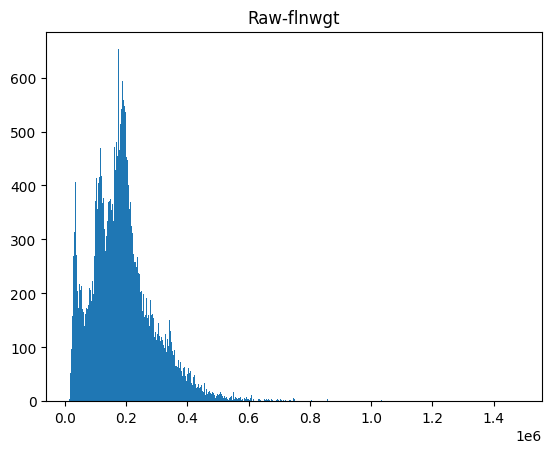

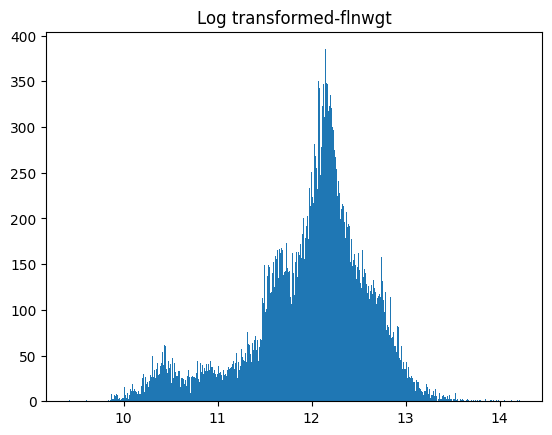

In [55]:
# Visualization of flnwgt
plt.hist(flnwgt_df['nd_raw'], bins = 500)
plt.title('Raw-flnwgt')
plt.show()

plt.hist(flnwgt_df['log_transformed'], bins = 500)
plt.title('Log transformed-flnwgt')
plt.show()

**. Feature Selection:**

* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
* Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [56]:
numercal_features_new = adult_data_nd.select_dtypes(include=np.number)
print(numercal_features_new.shape)
print(oh_race.shape)
full_numeric_df = pd.DataFrame()
full_numeric_df = pd.concat([numercal_features_new, oh_race, oh_sex, le_workclass, le_education, le_marital_status, le_occupation, le_relationship, le_native_country, oh_income_df], axis = 1)
full_numeric_df

(32537, 13)
(32537, 4)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,avg_hours_per_week_countrywise,capital_gain_countrywise,capital_loss_countrywise,finacial_impact,...,race_ Other,race_ White,sex_ Male,workclass,education,marital_status,occupation,relationship,native_country,income_ >50K
0,39,77516,13,2174,0,40,40.451892,1089.865091,88.562206,2174,...,0.0,1.0,1.0,7,9,4,1,1,39,0.0
1,50,83311,13,0,0,13,40.451892,1089.865091,88.562206,0,...,0.0,1.0,1.0,6,9,2,4,0,39,0.0
2,38,215646,9,0,0,40,40.451892,1089.865091,88.562206,0,...,0.0,1.0,1.0,4,11,0,6,1,39,0.0
3,53,234721,7,0,0,40,40.451892,1089.865091,88.562206,0,...,0.0,0.0,1.0,4,1,2,6,0,39,0.0
4,28,338409,13,0,0,40,39.157895,367.231579,70.042105,0,...,0.0,0.0,0.0,4,9,2,10,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,257302,12,0,0,38,40.451892,1089.865091,88.562206,0,...,0.0,1.0,0.0,4,7,2,13,5,39,0.0
32533,40,154374,9,0,0,40,40.451892,1089.865091,88.562206,0,...,0.0,1.0,1.0,4,11,2,7,0,39,1.0
32534,58,151910,9,0,0,40,40.451892,1089.865091,88.562206,0,...,0.0,1.0,0.0,4,11,6,1,4,39,0.0
32535,22,201490,9,0,0,20,40.451892,1089.865091,88.562206,0,...,0.0,1.0,1.0,4,11,4,1,3,39,0.0


In [57]:
print(numercal_features_new.index)

RangeIndex(start=0, stop=32537, step=1)


In [58]:
from sklearn.ensemble import IsolationForest

In [59]:
model01 = IsolationForest(contamination = 0.05)
model01.fit(full_numeric_df)

IsolationForest(contamination=0.05)

In [60]:
anomaly_df = pd.DataFrame()
anomaly_df['is_anomaly'] = model01.predict(full_numeric_df)
anomaly_df

,is_anomaly
0,1
1,1
2,1
3,1
4,-1
...,...
32532,1
32533,1
32534,1
32535,1


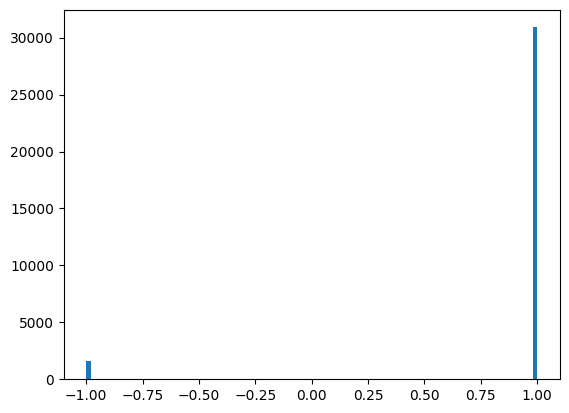

In [61]:
plt.hist(anomaly_df['is_anomaly'], bins = 100)
plt.show()

In [62]:
round((anomaly_df.value_counts()/len(anomaly_df))*100, 4)

,count
is_anomaly,
1,94.9995
-1,5.0005


In [63]:
anomaly_df.describe()

,is_anomaly
count,32537.000000
mean,0.899991
std,0.435916
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [64]:
model02 = IsolationForest(contamination = 0.01)
model02.fit(full_numeric_df)

IsolationForest(contamination=0.01)

In [65]:
anomaly_df['is_anomaly_model02'] = model02.predict(full_numeric_df)
anomaly_df

,is_anomaly,is_anomaly_model02
0,1,1
1,1,1
2,1,1
3,1,1
4,-1,-1
...,...,...
32532,1,1
32533,1,1
32534,1,1
32535,1,1


In [66]:
round(anomaly_df['is_anomaly_model02'].value_counts()/len(anomaly_df)*100, 4)

,count
is_anomaly_model02,
1,98.9981
-1,1.0019


In [67]:
model03 = IsolationForest(contamination = 'auto')
model03.fit(full_numeric_df)

IsolationForest()

In [68]:
anomaly_df['is_anomaly_model03'] = model03.predict(full_numeric_df)
anomaly_df

,is_anomaly,is_anomaly_model02,is_anomaly_model03
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,-1,-1,-1
...,...,...,...
32532,1,1,1
32533,1,1,1
32534,1,1,1
32535,1,1,1


In [69]:
round(anomaly_df['is_anomaly_model03'].value_counts()/len(anomaly_df)*100, 4)

,count
is_anomaly_model03,
1,89.7501
-1,10.2499


In [70]:
scores_m01 = model01.decision_function(full_numeric_df)
scores_m02 = model02.decision_function(full_numeric_df)
scores_m03 = model03.decision_function(full_numeric_df)

In [71]:
outlier_mask = model01.predict(full_numeric_df) == -1
cleaned = full_numeric_df[~outlier_mask]
print(cleaned.shape, full_numeric_df.shape)
print('Number of outliers removed-model01:', round((full_numeric_df.shape[0] - cleaned.shape[0])/ full_numeric_df.shape[0]*100, 2), '%')

(30910, 25) (32537, 25)
Number of outliers removed-model01: 5.0 %


In [72]:
outlier_mask = model02.predict(full_numeric_df) == -1
cleaned = full_numeric_df[~outlier_mask]
print(cleaned.shape, full_numeric_df.shape)
print('Number of outliers removed-model02:', round((full_numeric_df.shape[0] - cleaned.shape[0])/ full_numeric_df.shape[0]*100, 2), '%')

(32211, 25) (32537, 25)
Number of outliers removed-model02: 1.0 %


In [73]:
outlier_mask = model03.predict(full_numeric_df) == -1
cleaned = full_numeric_df[~outlier_mask]
print(cleaned.shape, full_numeric_df.shape)
print('Number of outliers removed-model03:', round((full_numeric_df.shape[0] - cleaned.shape[0])/ full_numeric_df.shape[0]*100, 2), '%')

(29202, 25) (32537, 25)
Number of outliers removed-model03: 10.25 %


Note: the parameter 'contamination' set during model building. The number of outliers detected or identified relects the 'contamination' value. The 'contamination' value is not imposed by the model but it acts as a threshold, meaning only the specified 'contamination' number of outliers are identified. If the dataset has less than the specified number of outliers, then model will only flag the most anomalous ones.

In [74]:
anomaly_df.rename(columns = {'is_anomaly' : 'is_anomaly_model01'}, inplace = True)
anomaly_df.columns

Index(['is_anomaly_model01', 'is_anomaly_model02', 'is_anomaly_model03'], dtype='object')

Validation: Check Anomaly Score

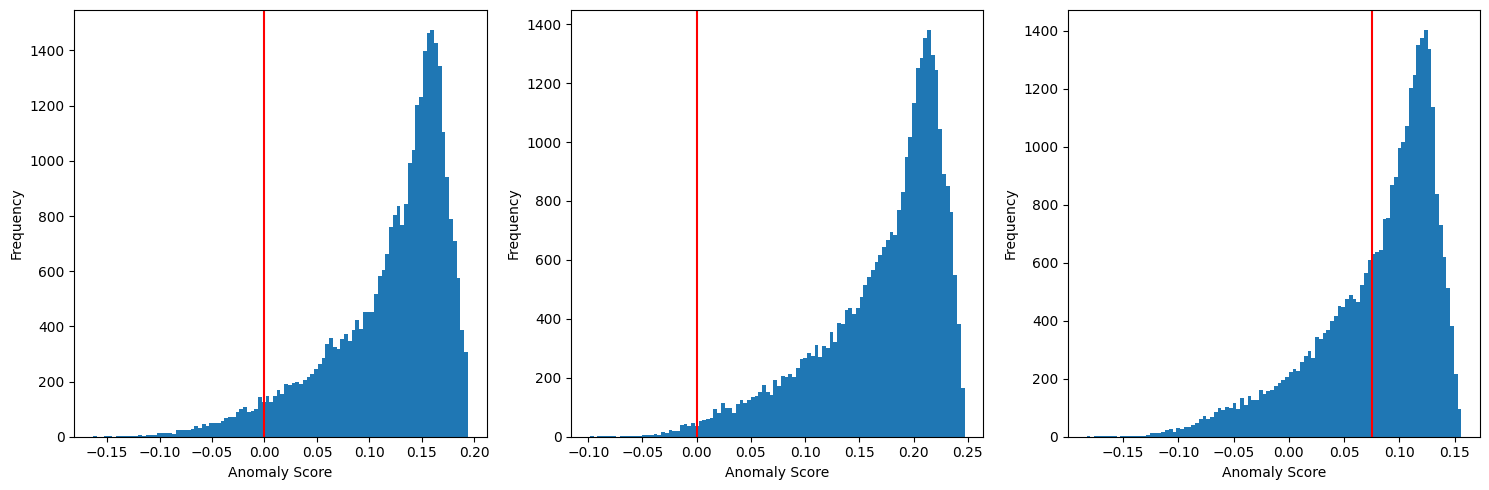

In [75]:
plt.figure(figsize=(15, 5)) # Added to make the plots easier to see

plt.subplot(1, 3, 1)
plt.hist(scores_m01, bins = 100)
plt.axvline(np.percentile(scores_m01, 100 * 0.05), color = 'r')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(scores_m02, bins = 100)
plt.axvline(np.percentile(scores_m02, 100 * 0.01), color = 'r')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(scores_m03, bins = 100)
plt.axvline(np.percentile(scores_m02, 100 * 0.085), color = 'r')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Among the three Isolation models, contamination = 0.01 (1%: model02) appears to have the least outliers as the tail left of the vertical line is small (middle plot). In the other models, the chances of false positive are higher.